# Introduction

In this file I'll be displaying Week 1: Exploratary data analysis and, week 2: Linear regression. The file consist of 5 areas: Exploratory data analysis, Predictive model, Evaluation and Conclusion.
The file is written with jupiter notebook.
Enjoy.

### Data cleaning >>>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 

steps = pd.read_csv("steps.csv", sep = ";")
survey = pd.read_csv("survey.csv")

df = pd.merge(steps, survey, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
# Create mean steps per participant variable

mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis = 1)
mean_steps.head()

mean_steps.apply(pd.to_numeric, errors='coerce')

def above_5(x):
    if(x < 5.0 or x > 20000): 
        return float('NaN')
    else: 
        return x
    
mean_steps.apply(above_5)


0      10205.521212
1       5687.423313
2       8301.729730
3       3633.200000
4       5312.129630
           ...     
924     6282.131868
925     4799.880000
926    10030.326829
927    15679.679012
928     7584.467153
Length: 929, dtype: float64

In [3]:
mean_steps.head()

0    10205.521212
1     5687.423313
2     8301.729730
3     3633.200000
4     5312.129630
dtype: float64

### Exploratory data analysis >>>

In [4]:
# create a new pandas Dataframe out of the variable
df_set = pd.DataFrame(mean_steps)
# changing the name of the column
df_set = df_set.rename(columns = {0 : "mean"})
# creating a new id column based on the index of the dataframe + 1
df_set["id"] = df_set.index +1
# create a new variable cols to rearange columns
cols = df_set.columns.tolist()
# rearanging columns
cols = cols[-1:] + cols[:-1]
df_set = df_set[cols]
# reseting the index
df_set = df_set.reset_index(drop = True)
df_set.head(5)

,id,mean
0,1,10205.521212
1,2,5687.423313
2,3,8301.729730
3,4,3633.200000
4,5,5312.129630


In [5]:
# joining the master data frame with the new mean dataframe
df = pd.merge(df, df_set, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


In [6]:
# creating a subset dataframe

df_subset = df[["mean", "height", "weight"]]
df_subset

,mean,height,weight
0,10205.521212,178.0,98.0
1,5687.423313,180.0,77.0
2,8301.729730,180.0,83.0
3,3633.200000,178.0,80.0
4,5312.129630,167.0,61.0
...,...,...,...
924,6282.131868,165.0,59.0
925,4799.880000,192.0,90.0
926,10030.326829,181.0,71.0
927,15679.679012,172.0,65.0


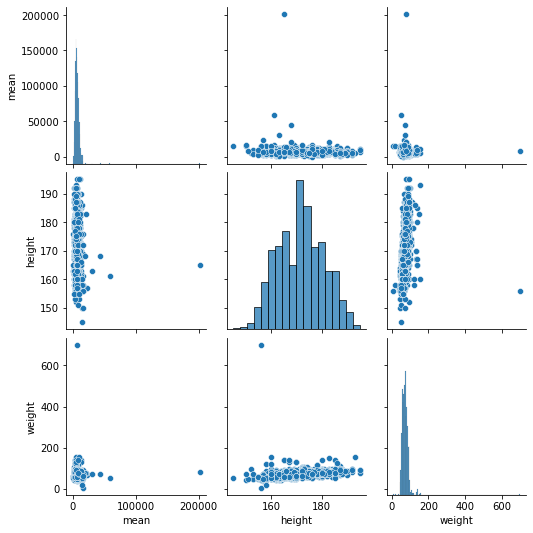

In [7]:
# creating a plot without removing anamolies.

sns.pairplot(df_subset)
plt.show()

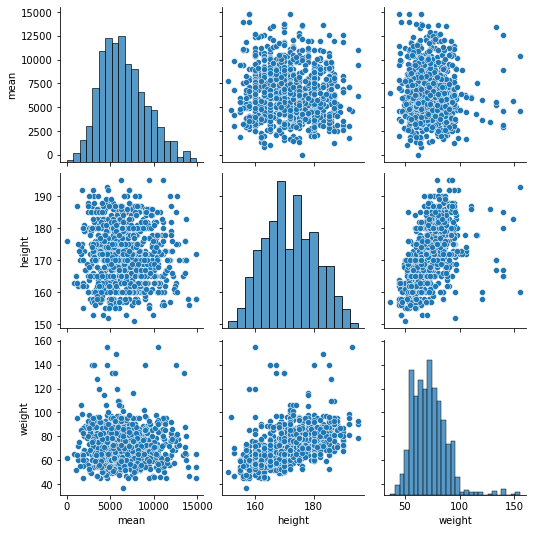

In [8]:
#creating a plot with removed anamolies.

df_subset = df_subset[(df_subset["height"] > 0) & (df_subset["weight"] > 30) & (df_subset["weight"] < 200) & (df_subset["mean"] < 15000) ] 
sns.pairplot(df_subset)
plt.show()

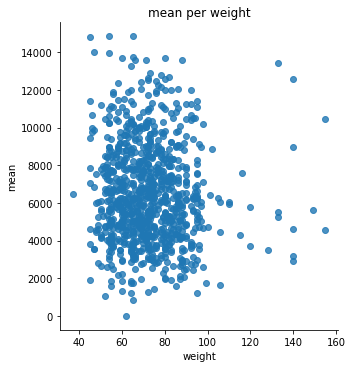

In [9]:
# zoom in on mean per weight
sns.lmplot(x='weight', y='mean', fit_reg=False, data=df_subset)
plt.xlabel('weight') 
plt.ylabel('mean')
plt.title('mean per weight')
plt.show()

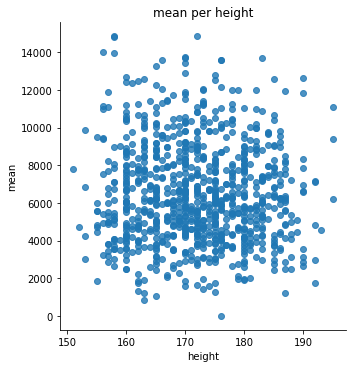

In [10]:
# zoom in on height per weight
sns.lmplot(x='height', y='mean', fit_reg=False, data=df_subset)
plt.xlabel('height') 
plt.ylabel('mean')
plt.title('mean per height')
plt.show()

In [11]:
print(pearsonr(df_subset['mean'],df_subset['height']))
print(pearsonr(df_subset['mean'],df_subset['weight']))

(-0.03526920171856954, 0.2905415292587428)
(-0.051839233601363346, 0.12016995410186508)


The analysis of mean as an independant variable, with hieght as the dependand variables above shows the following:

- Mean and Height are in a weak positive linear correlation (r = 0.011)
- The correlation is weakly significant ( 0.1 < p < 0.7)

The analysis of mean as an independant variable, with hieght as the dependand variable done below shows the following:

- Mean and Weight are in a moderate negative linear correlation (r = - 0.08)
- The correlation is weakly significant ( 0.1 < p < 0.3)

### Predicitive model

Linear regression: linear regression is a method to calculate/predict a variable that is unknown with a variable that is known.

In [12]:
df = df_subset
df = df.sort_values(by='mean', ascending=True) #sort the data set to see the biggest channels first

df.head(10)

,mean,height,weight
616,4.000000,176.0,62.0
120,842.000000,163.0,65.0
766,1032.500000,165.0,52.0
866,1210.000000,163.0,64.0
30,1218.500000,187.0,95.0
560,1289.555556,175.0,72.0
11,1303.611111,162.0,60.0
809,1449.400000,173.0,75.0
712,1598.000000,170.0,55.0
499,1612.300000,174.0,85.0


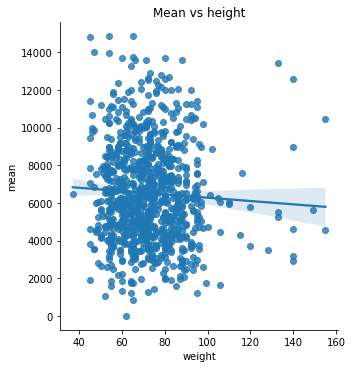

In [13]:
sns.lmplot(x='weight', y='mean', data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('weight')
plt.ylabel('mean')
plt.title('Mean vs height')
plt.show()

Notes: 

- The data doesn;t seem to fit a linear pattern.

In [14]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['weight']] 
y = df['mean']
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

In [15]:
df['mean_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head()

,mean,height,weight,mean_p
616,4.0,176.0,62.0,6610.072456
120,842.0,163.0,65.0,6583.662624
766,1032.5,165.0,52.0,6698.105228
866,1210.0,163.0,64.0,6592.465902
30,1218.5,187.0,95.0,6319.564308


In [16]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df['mean'], df['mean_p'])

0.0026873061403768217

The R2 is 0.0027. It means that I probably have used a wrong way to calcute the R2. It can't be this low. I'll take a look at it this week.

### Evaluation

In [17]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(df['mean'], df['mean_p']))

2627.320293989916

Mean off: 2627.32. This is a lot, althougth people's steps a day is very different considering every day life for people is also very different. I think this isn't a very bad outcome. 

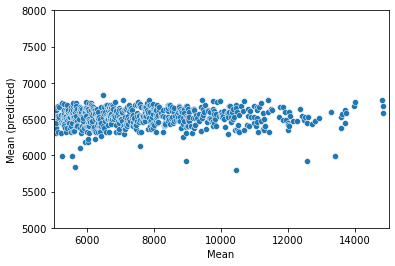

In [23]:
sns.scatterplot(x='mean',y='mean_p',data=df)
plt.xlim(5000, 15000)
plt.ylim(5000, 8000)
plt.xlabel('Mean')
plt.ylabel('Mean (predicted)')
plt.show()

On the x-axis we have the actual mean. On the y-axis we have the predicted mean. If the model is perfect, all points should be on the line. Obviously, they are not.

We can conclude that our model predicts too high for low numbers, and predicts too low for high numbers.